In [1]:
import math

def CRR_put(S, K, r, T, N, sigma):
    dt = T / N
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    p = (math.exp(r * dt) - d) / (u - d)
    D = S / (u*d)
    # Generate stock price tree
    stock_prices = [[0 for j in range(i + 1)] for i in range(N + 3)]
    for i in range(N + 3):
        for j in range(i + 1):
            stock_prices[i][j] = D * (u ** (i - j)) * (d ** j)
    
    # Generate option value tree
    option_values = [[0 for j in range(i + 1)] for i in range(N + 3)]
    
    # Calculate option values at maturity
    for j in range(N + 3):
        option_values[N+2][j] = max(0, K - stock_prices[N+2][j])
    
    # Backward induction to calculate european option prices
    for i in range(N + 1, -1, -1):
        for j in range(i + 1):
            option_values[i][j] = math.exp(-r * dt) * (p * option_values[i + 1][j] + (1 - p) * option_values[i + 1][j + 1])

    european_option_value = option_values[2][1]
    
    # Calculate european option Greeks
    delta_eur = (option_values[2][0] - option_values[2][2]) / (stock_prices[2][0] - stock_prices[2][2])
    gamma_eur = ((option_values[2][0] - option_values[2][1]) / (stock_prices[2][0] - stock_prices[2][1]) -
             (option_values[2][1] - option_values[2][2]) / (stock_prices[2][1] - stock_prices[2][2])) / \
            ((stock_prices[2][0] - stock_prices[2][2]) / 2)
    theta_eur = (option_values[4][2] - option_values[0][0]) / (4*dt)
    
    # Backward induction to calculate american option prices
    for i in range(N + 1, -1, -1):
        for j in range(i + 1):
            exercise_value = max(0, K - stock_prices[i][j])
            option_values[i][j] = max(exercise_value, math.exp(-r * dt) * (p * option_values[i + 1][j] + (1 - p) * option_values[i + 1][j + 1]))

    american_option_value = option_values[2][1]
    
    # Calculate american option Greeks
    delta_us = (option_values[2][0] - option_values[2][2]) / (stock_prices[2][0] - stock_prices[2][2])
    gamma_us = ((option_values[2][0] - option_values[2][1]) / (stock_prices[2][0] - stock_prices[2][1]) -
             (option_values[2][1] - option_values[2][2]) / (stock_prices[2][1] - stock_prices[2][2])) / \
            ((stock_prices[2][0] - stock_prices[2][2]) / 2)
    theta_us = (option_values[4][2] - option_values[0][0]) / (4*dt)
    
    return european_option_value, delta_eur, gamma_eur, theta_eur, american_option_value, delta_us, gamma_us, theta_us


In [2]:
def input_data(filename):
    with open(filename, 'r') as file:
        # read file contents
        lines = file.readlines()
    # initializing variables
    S, r, sigma, T, K, N = None, None, None, None, None, None
    # reading lines in file
    for line in lines:
        # split line for two parts before and after "="
        parts = line.split('=')
        # check if line was split into to parts
        if len(parts) == 2:
            # delete spaces for the end
            variable_name = parts[0].strip()
            value = parts[1].strip()
            # assing values to variables
            if variable_name == 'S0':
                S = float(value)
            elif variable_name == 'r':
                r = float(value)
            elif variable_name == 'sigma':
                sigma = float(value)
            elif variable_name == 'T':
                T = float(value)
            elif variable_name == 'K':
                K = float(value)
            elif variable_name == 'N':
                N = int(value)
    european_option_value, delta_eur, gamma_eur, theta_eur, american_option_value, delta_us, gamma_us, theta_us = CRR_put(S, K, r, T, N, sigma)
    print("European option")
    print("Option Price:", european_option_value)
    print("Delta:", delta_eur)
    print("Gamma:", gamma_eur)
    print("Theta:", theta_eur)
    print("American option")
    print("Option Price:", american_option_value)
    print("Delta:", delta_us)
    print("Gamma:", gamma_us)
    print("Theta:", theta_us)


In [3]:
input_data('cp1_data.txt')

European option
Option Price: 4.636168423656999
Delta: -0.19026779989875706
Gamma: 0.0073380911849972065
Theta: -0.950879573791615
American option
Option Price: 5.498892343986378
Delta: -0.24100450986374328
Gamma: 0.010370404584636039
Theta: -1.7186020732631018


In [4]:
import matplotlib.pyplot as plt

In [5]:
def download_data(filename):
    with open(filename, 'r') as file:
        # read file contents
        lines = file.readlines()
    # initializing variables
    S, r, sigma, T, K, N = None, None, None, None, None, None
    # reading lines in file
    for line in lines:
        # split line for two parts before and after "="
        parts = line.split('=')
        # check if line was split into to parts
        if len(parts) == 2:
            # delete spaces for the end
            variable_name = parts[0].strip()
            value = parts[1].strip()
            # assing values to variables
            if variable_name == 'S0':
                S = float(value)
            elif variable_name == 'r':
                r = float(value)
            elif variable_name == 'sigma':
                sigma = float(value)
            elif variable_name == 'T':
                T = float(value)
            elif variable_name == 'K':
                K = float(value)
            elif variable_name == 'N':
                N = int(value)
    return S, r, sigma, T, K, N

S, r, sigma, T, K, N = download_data('cp1_data.txt')


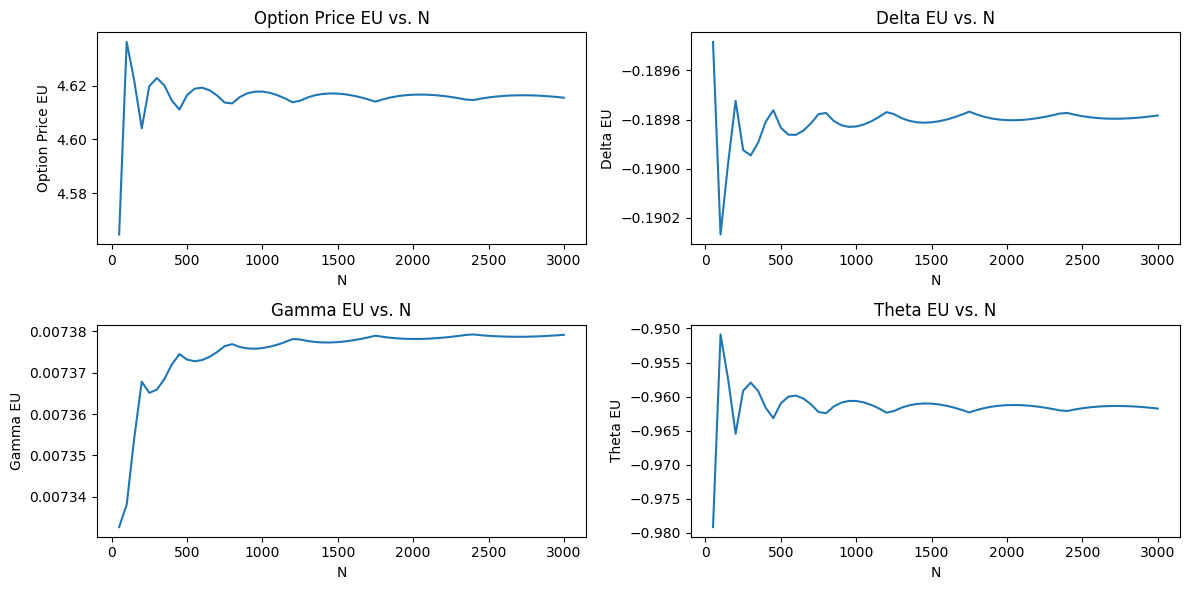

In [6]:
N_values = list(range(50, 3050, 50))

# Lists to store results
option_prices = []
deltas = []
gammas = []
thetas = []

# Calculate option prices and Greeks for each N
for N in N_values:
    option_price, delta, gamma, theta,_,_,_,_ = CRR_put(S, K, r, T, N, sigma)
    option_prices.append(option_price)
    deltas.append(delta)
    gammas.append(gamma)
    thetas.append(theta)

# Plotting
plt.figure(figsize=(12, 6))

# Option price plot
plt.subplot(2, 2, 1)
plt.plot(N_values, option_prices)
plt.title('Option Price EU vs. N')
plt.xlabel('N')
plt.ylabel('Option Price EU')

# Delta plot
plt.subplot(2, 2, 2)
plt.plot(N_values, deltas)
plt.title('Delta EU vs. N')
plt.xlabel('N')
plt.ylabel('Delta EU')

# Gamma plot
plt.subplot(2, 2, 3)
plt.plot(N_values, gammas)
plt.title('Gamma EU vs. N')
plt.xlabel('N')
plt.ylabel('Gamma EU')

# Theta plot
plt.subplot(2, 2, 4)
plt.plot(N_values, thetas)
plt.title('Theta EU vs. N')
plt.xlabel('N')
plt.ylabel('Theta EU')


plt.tight_layout()
plt.show()

In [7]:
import numpy as np
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    delta = -norm.cdf(-d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    theta = -(S * norm.pdf(-d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)
    return put_price, delta, gamma, theta

option_price_reference, delta_reference, gamma_reference, theta_reference = black_scholes(S, K, T, r, sigma)

In [8]:
price_errors = np.abs(np.array(option_prices) - option_price_reference)
delta_errors = np.abs(np.array(deltas) - delta_reference)
gamma_errors = np.abs(np.array(gammas) - gamma_reference)
theta_errors = np.abs(np.array(thetas) - theta_reference)

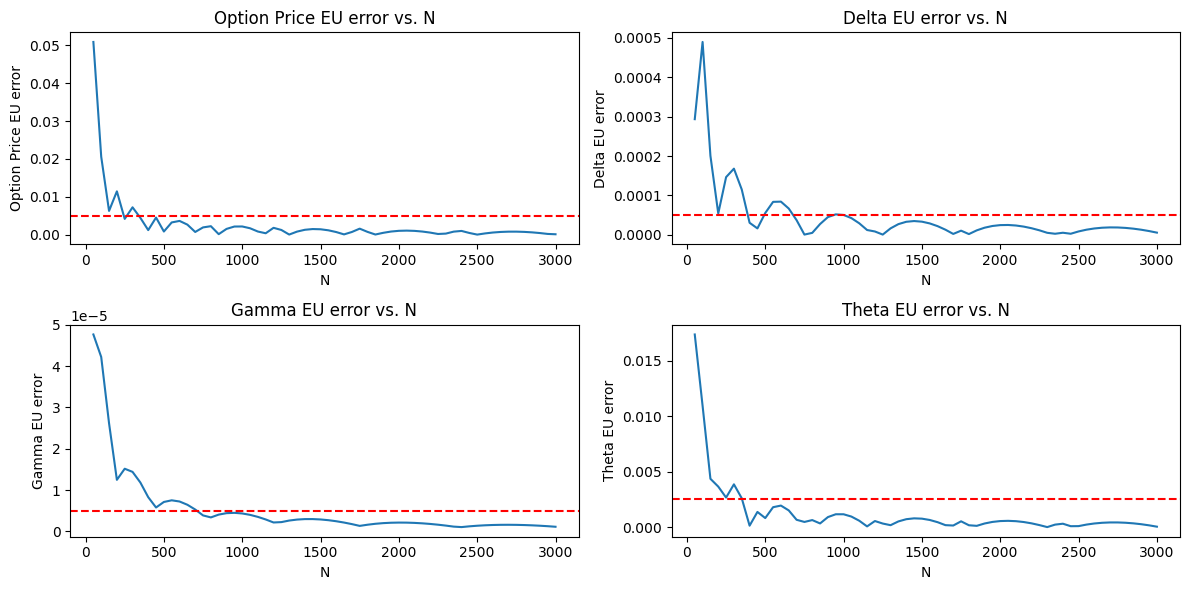

In [9]:
# Plotting errors
plt.figure(figsize=(12, 6))

# Option price plot
plt.subplot(2, 2, 1)
plt.plot(N_values, price_errors)
plt.axhline(y=0.005, color='r', linestyle='--', label='0.005 Level')
plt.title('Option Price EU error vs. N')
plt.xlabel('N')
plt.ylabel('Option Price EU error')

# Delta plot
plt.subplot(2, 2, 2)
plt.plot(N_values, delta_errors)
plt.axhline(y=0.00005, color='r', linestyle='--', label='0.00005 Level')
plt.title('Delta EU error vs. N')
plt.xlabel('N')
plt.ylabel('Delta EU error')

# Gamma plot
plt.subplot(2, 2, 3)
plt.plot(N_values, gamma_errors)
plt.axhline(y=0.000005, color='r', linestyle='--', label='0.000005 Level')
plt.title('Gamma EU error vs. N')
plt.xlabel('N')
plt.ylabel('Gamma EU error')

# Theta plot
plt.subplot(2, 2, 4)
plt.plot(N_values, theta_errors)
plt.axhline(y=0.0025, color='r', linestyle='--', label='0.000005 Level')
plt.title('Theta EU error vs. N')
plt.xlabel('N')
plt.ylabel('Theta EU error')


plt.tight_layout()
plt.show()

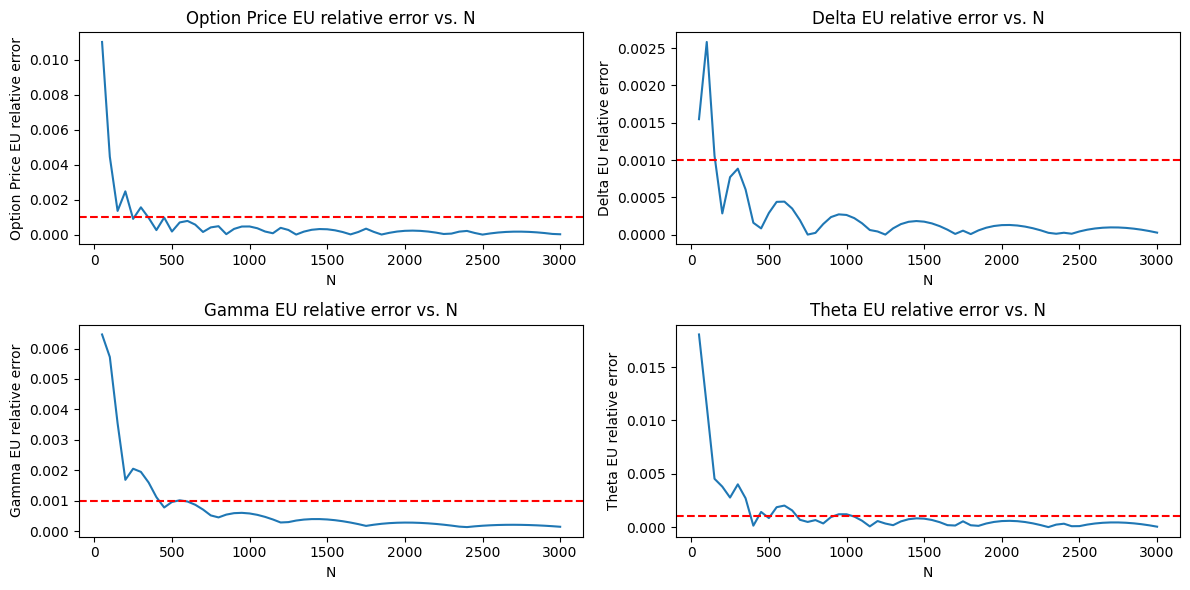

In [10]:
#relative error of price
price_errors_relative = np.abs(np.array(option_prices) - option_price_reference)/np.abs(option_price_reference)
delta_errors_relative = np.abs(np.array(deltas) - delta_reference)/np.abs(delta_reference)
gamma_errors_relative= np.abs(np.array(gammas) - gamma_reference)/np.abs(gamma_reference)
theta_errors_relative = np.abs(np.array(thetas) - theta_reference)/np.abs(theta_reference)
# Plotting relative errors
plt.figure(figsize=(12, 6))

# Option price plot
plt.subplot(2, 2, 1)
plt.plot(N_values, price_errors_relative)
plt.axhline(y=0.001, color='r', linestyle='--', label='0.001 Level')
plt.title('Option Price EU relative error vs. N')
plt.xlabel('N')
plt.ylabel('Option Price EU relative error')

# Delta plot
plt.subplot(2, 2, 2)
plt.plot(N_values, delta_errors_relative)
plt.axhline(y=0.001, color='r', linestyle='--', label='0.001 Level')
plt.title('Delta EU relative error vs. N')
plt.xlabel('N')
plt.ylabel('Delta EU relative error')

# Gamma plot
plt.subplot(2, 2, 3)
plt.plot(N_values, gamma_errors_relative)
plt.axhline(y=0.001, color='r', linestyle='--', label='0.001 Level')
plt.title('Gamma EU relative error vs. N')
plt.xlabel('N')
plt.ylabel('Gamma EU relative error')

# Theta plot
plt.subplot(2, 2, 4)
plt.plot(N_values, theta_errors_relative)
plt.axhline(y=0.001, color='r', linestyle='--', label='0.001 Level')
plt.title('Theta EU relative error vs. N')
plt.xlabel('N')
plt.ylabel('Theta EU relative error')


plt.tight_layout()
plt.show()